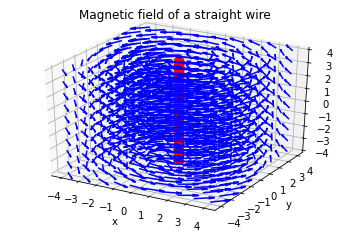

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
z = np.linspace(-4,4,10)

x,y,z = np.meshgrid(x,y,z)

# 3d figure
fig = plt.figure()
ax = fig.gca(projection='3d')

def B(x,y):
    i = 1                                           #Amps in the wire
    mu = 1.26 * 10**(-6)                            #Magnetic constant                       
    mag = (mu/(2*np.pi))*(i/np.sqrt((x)**2+(y)**2)) #Magnitude of the vector B
    by = mag * (np.cos(np.arctan2(y,x)))            #By
    bx = mag * (-np.sin(np.arctan2(y,x)))           #Bx
    bz = z*0                                        #Bz (zero, using the right-hand rule)
    return bx,by,bz

def cylinder(r):
    phi = np.linspace(-2*np.pi,2*np.pi,100)
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x,y

# Plot of the fields
bx,by,bz = B(x,y)                                   #Magnetic field
cx,cy = cylinder(0.2)                               #Wire

# Plot of the 3d vector field
ax.quiver(x,y,z,bx,by,bz,color='b',length=1,normalize=True)
                                                    #Plot the magnetic field
for i in np.linspace(-4,4,800):                     #Plot the wire
    ax.plot(cx,cy,i,label='Cylinder',color='r')

plt.title('Magnetic field of a straight wire')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

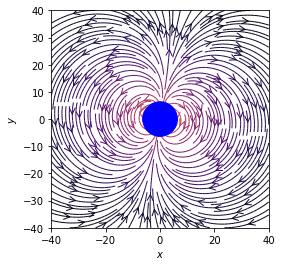

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(9.6)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)
# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


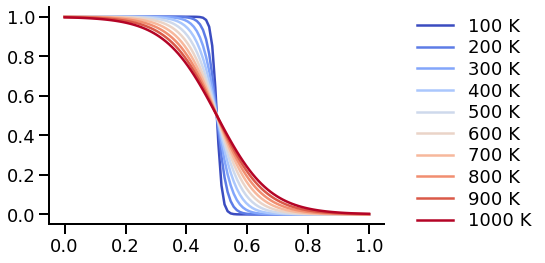

In [3]:
# Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Fermi-Dirac Distribution
def fermi(E: float, E_f: float, T: float) -> float:
    k_b = 8.617 * (10**-5) # eV/K
    return 1/(np.exp((E - E_f)/(k_b * T)) + 1)
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
# Temperature values
T = np.linspace(100, 1000, 10)
# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', 10)
# Plot F-D data
for i in range(len(T)):
    x = np.linspace(0, 1, 100)
    y = fermi(x, 0.5, T[i])
    ax.plot(x, y, color=colors(i), linewidth=2.5)
# Add legend
labels = ['100 K', '200 K', '300 K', '400 K', '500 K', '600 K', 
          '700 K', '800 K', '900 K', '1000 K']
ax.legend(labels, bbox_to_anchor=(1.05, -0.1), loc='lower left', 
          frameon=False, labelspacing=0.2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *
from PySpice.Physics.SemiConductor import ShockleyDiode


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)
circuit = Circuit('Diode Characteristic Curve')

circuit.include(spice_library['1N4148'])

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 1@u_Ω) # not required for simulation
circuit.X('D1', '1N4148', 'out', circuit.gnd)
# Fixme: Xyce ???
temperatures = [0, 25, 100]@u_Degree
analyses = {}
for temperature in temperatures:
    simulator = circuit.simulator(temperature=temperature, nominal_temperature=temperature)
    analysis = simulator.dc(Vinput=slice(-2, 5, .01))
    analyses[float(temperature)] = analysis
silicon_forward_voltage_threshold = .7

shockley_diode = ShockleyDiode(Is=4e-9, degree=25)

def two_scales_tick_formatter(value, position):
    if value >= 0:
        return '{} mA'.format(value)
    else:
        return '{} nA'.format(value/100)
formatter = ticker.FuncFormatter(two_scales_tick_formatter)

figure, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

ax1.set_title('1N4148 Characteristic Curve ')
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Current')
ax1.grid()
ax1.set_xlim(-2, 2)
ax1.axvspan(-2, 0, facecolor='green', alpha=.2)
ax1.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
ax1.axvspan(silicon_forward_voltage_threshold, 2, facecolor='blue', alpha=.2)
ax1.set_ylim(-500, 750) # Fixme: round
ax1.yaxis.set_major_formatter(formatter)
Vd = analyses[25].out
# compute scale for reverse and forward region
forward_region = Vd >= 0@u_V
reverse_region = np.invert(forward_region)
scale =  reverse_region*1e11 + forward_region*1e3
for temperature in temperatures:
    analysis = analyses[float(temperature)]
    ax1.plot(Vd, - analysis.Vinput * scale)
ax1.plot(Vd, shockley_diode.I(Vd) * scale, 'black')
ax1.legend(['@ {} °C'.format(temperature)
            for temperature in temperatures] + ['Shockley Diode Model Is = 4 nA'],
           loc=(.02,.8))
ax1.axvline(x=0, color='black')
ax1.axhline(y=0, color='black')
ax1.axvline(x=silicon_forward_voltage_threshold, color='red')
ax1.text(-1, -100, 'Reverse Biased Region', ha='center', va='center')
ax1.text( 1, -100, 'Forward Biased Region', ha='center', va='center')
ax2.set_title('Resistance @ 25 °C')
ax2.grid()
ax2.set_xlim(-2, 3)
ax2.axvspan(-2, 0, facecolor='green', alpha=.2)
ax2.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
ax2.axvspan(silicon_forward_voltage_threshold, 3, facecolor='blue', alpha=.2)
analysis = analyses[25]
static_resistance = -analysis.out / analysis.Vinput
dynamic_resistance = np.diff(-analysis.out) / np.diff(analysis.Vinput)
ax2.semilogy(analysis.out, static_resistance, basey=10)
ax2.semilogy(analysis.out[10:-1], dynamic_resistance[10:], basey=10)
ax2.axvline(x=0, color='black')
ax2.axvline(x=silicon_forward_voltage_threshold, color='red')
ax2.axhline(y=1, color='red')
ax2.text(-1.5, 1.1, 'R limitation = 1 Ω', color='red')
ax2.legend(['{} Resistance'.format(x) for x in ('Static', 'Dynamic')], loc=(.05,.2))
ax2.set_xlabel('Voltage [V]')
ax2.set_ylabel('Resistance [Ω]')

plt.tight_layout()
plt.show()


2021-03-24 18:07:30,797 - PySpice.Doc.ExampleTools - ExampleTools.INFO - SPICE library path is D:\Software\Python\lib\libraries


KeyError: '1N4148'

In [5]:
init = State(T=90)
coffee = System(init=init,
                volume=300,
                r=0.01,
                T_env=22,
                t_0=0,
                t_end=30,
                dt=1)
def update_func(state, t, system):
    r, T_env, dt = system.r, system.T_env, system.dt
    T = state.T
    T += -r * (T - T_env) * dt
    return State(T=T)
update_func(init, 0, coffee)
def run_simulation(system, update_func):
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    return frame
results = run_simulation(coffee, update_func)
def make_system(T_init, r, volume, t_end):
    init = State(T=T_init)
    return System(init=init,
                  r=r,
                  volume=volume,
                  temp=T_init,
                  t_0=0,
                  t_end=t_end,
                  dt=1,
                  T_env=22)
coffee = make_system(T_init=90, r=0.01,
                     volume=300, t_end=30)
results = run_simulation(coffee, update_func)


NameError: name 'State' is not defined

In [9]:
params = Params(G0 = 290,
k1 = 0.03,
k2 = 0.02,
k3 = 1e-05)
def make_system(params, data):
    G0, k1, k2, k3 = params
    Gb = data.glucose[0]
    Ib = data.insulin[0]
    I = interpolate(data.insulin)
    t_0 = get_first_label(data)
    t_end = get_last_label(data)
    init = State(G=G0, X=0)
return System(params,
init=init, Gb=Gb, Ib=Ib, I=I,
t_0=t_0, t_end=t_end, dt=2)
def update_func(state, t, system):
    G, X = state
    k1, k2, k3 = system.k1, system.k2, system.k3
    I, Ib, Gb = system.I, system.Ib, system.Gb
    dt = system.dt
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    G += dGdt * dt
    X += dXdt * dt
return State(G=G, X=X)
update_func(system.init, system.t_0, system)
def run_simulation(system, update_func):
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
return frame
results = run_simulation(system, update_func)


NameError: name 'Params' is not defined

In [10]:
import numpy as np
L = np.random.random(100)
sum(L)
55.61209116604941
np.sum(L)
55.612091166049424
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)
np.min(big_array), np.max(big_array)
%timeit min(big_array)
%timeit np.min(big_array)
print(big_array.min(), big_array.max(), big_array.sum())


249 ms ± 36.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.52 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
146 ms ± 9.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.89 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.833548814062397e-07 0.9999994991294605 499972.5964321807
